# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [2]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 7.83 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

QUESTION 1

In [3]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
df= pd.read_csv('EDA/assignment/data/ForeignGifts_edu.csv')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


QUESTION 2

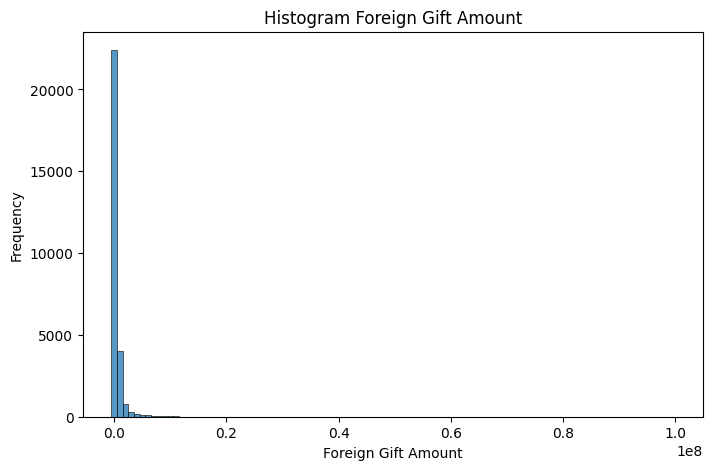

In [4]:
plt.figure(figsize= (8,5))
sns.histplot(df['Foreign Gift Amount'], bins= 100, kde= False)
plt.title('Histogram Foreign Gift Amount')
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.show()

The histogram above shows a highly skewed distribution (skewed to the right). This means that the majority of foreign gifts are very small amounts. This could be explained bybthe fact that not eveyr univeristy receives large foreign donations, or some values recored may be very small that the reporting values are roundded zero.

QUESTION 3


In [5]:
#Plotting value count table which the proportions
gift_types_counts= df['Gift Type'].value_counts(normalize=True) # the normalize parameter gets the proportions
print(f"The proportion of contracts is {gift_types_counts['Contract'].round(2)}")
print(f"The proportion of real estate is {gift_types_counts['Real Estate'].round(2)}")
print(f"The proportion of monetary gifts is {gift_types_counts['Monetary Gift'].round(2)}")

The proportion of contracts is 0.61
The proportion of real estate is 0.0
The proportion of monetary gifts is 0.39


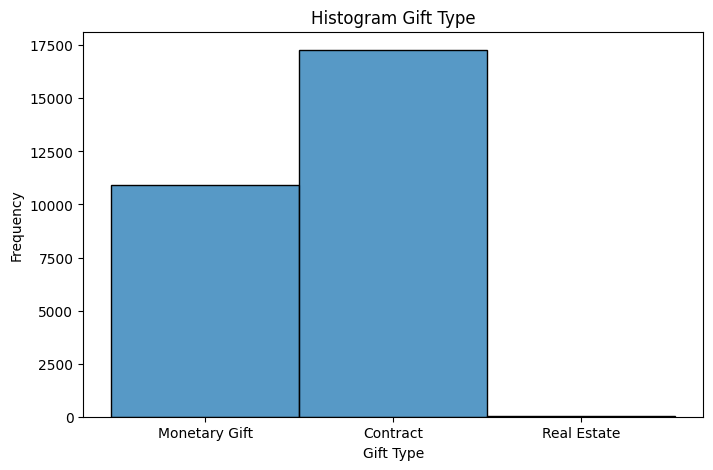

In [6]:
#Plotting histogram
plt.figure(figsize= (8,5))
sns.histplot(df['Gift Type'], bins= 50, kde= False)
plt.title('Histogram Gift Type')
plt.xlabel("Gift Type")
plt.ylabel("Frequency")
plt.show()

QUESTION 4

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


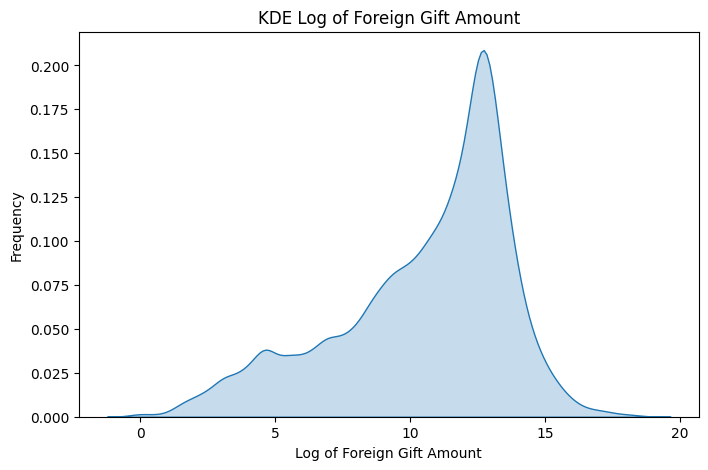

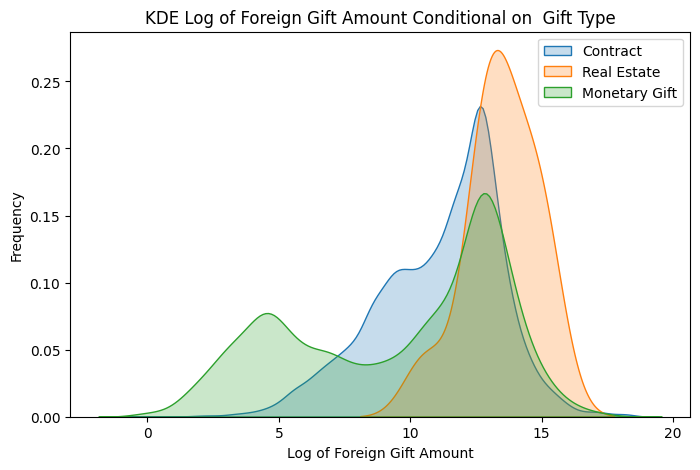

In [7]:
#Plotting KDE of log for Foreign Gift
df['Log_Foreign_Gift']= np.log(df['Foreign Gift Amount'])
plt.figure(figsize= (8,5))
sns.kdeplot(df['Log_Foreign_Gift'], fill= True)
plt.title('KDE Log of Foreign Gift Amount')
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Frequency")
plt.show()

#Plotting KDE of log for Gift Amount by Gift Type
# This plots a KDE, it looks for the Gift Type coloumn in the dataframe and finds the three gift types and makes it conditonal on the Log conversion variable we made earlier
plt.figure(figsize= (8,5))
sns.kdeplot(df[df['Gift Type']== 'Contract']['Log_Foreign_Gift'], fill= True, label= 'Contract')
sns.kdeplot(df[df['Gift Type']== 'Real Estate']['Log_Foreign_Gift'], fill= True, label= 'Real Estate')
sns.kdeplot(df[df['Gift Type']== 'Monetary Gift']['Log_Foreign_Gift'], fill= True, label= 'Monetary Gift')
plt.title('KDE Log of Foreign Gift Amount Conditional on  Gift Type')
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


From this, we can see that real estate gifts tend to be large ( A high peak on log value 12-15)- less variation in the size of gifts ( narrow). For Contracts, we see the a peak similar to the area around the real estate gifts, and the distribution tends to be less variation (narrow). Finally, the Monetary Gifts have high variation ( wider spread) and tends to have two main peaks - have a broad distribution. Something I noticed was that they followed a similar shape/ peak as the foreign gift amount KDE plot.

QUESTION 5

The top 15 countries are: 
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


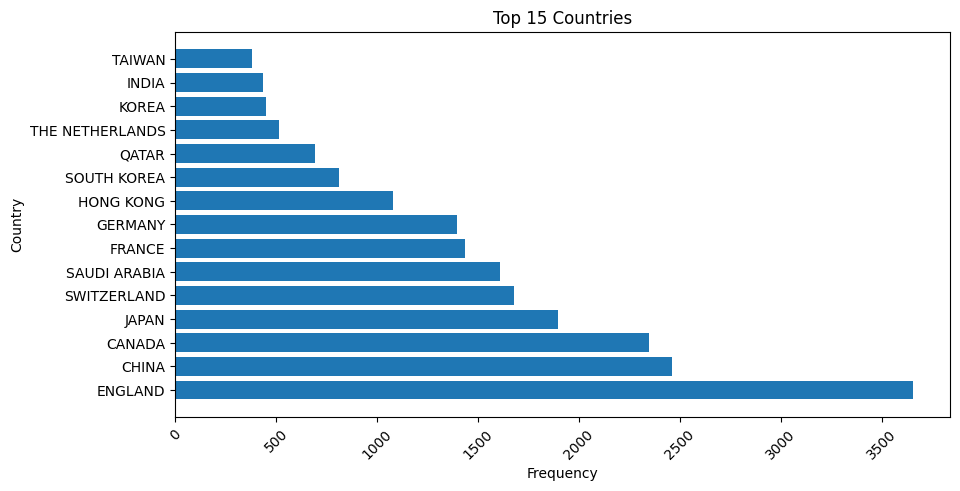

In [8]:
#grouping the country - by number of gifts
top_c= df.groupby("Country of Giftor").size().sort_values(ascending= False).head(15)
print(f"The top 15 countries are: \n {top_c}")

plt.figure(figsize=(10,5))
plt.barh(top_c.index, top_c.values)
plt.title('Top 15 Countries')
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.show()

The top 15 countries are: 
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


Text(0, 0.5, 'Country')

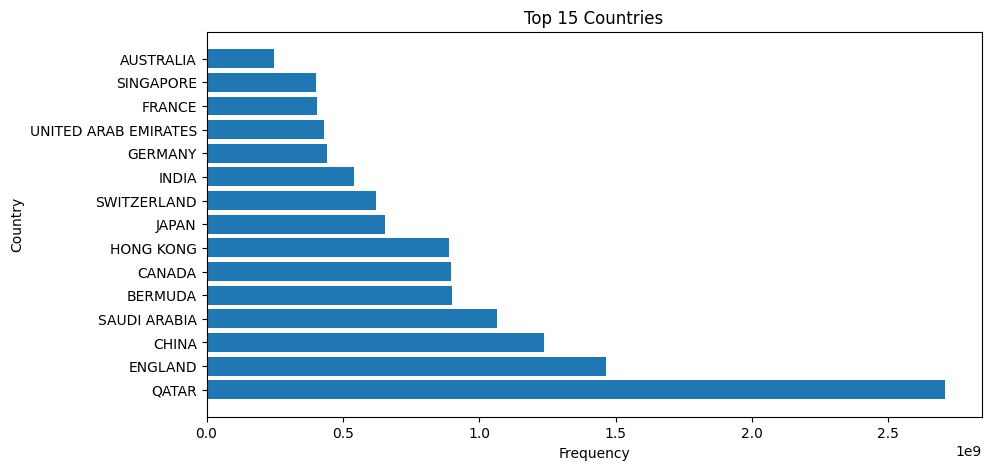

In [9]:
#grouping the country - by the amount given
top_c1= df.groupby("Country of Giftor")['Foreign Gift Amount'].sum().sort_values(ascending= False).head(15)
print(f"The top 15 countries are: \n {top_c}")

plt.figure(figsize=(10,5))
plt.barh(top_c1.index, top_c1.values)
plt.title('Top 15 Countries')
plt.xlabel("Frequency")
plt.ylabel("Country")

QUESTION 6

The top 15 institutions are: 
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


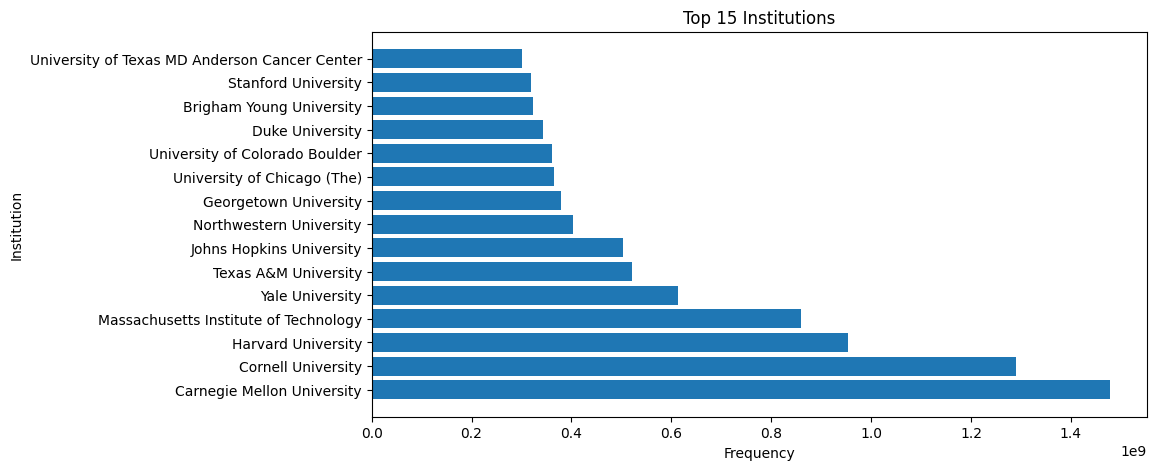

In [10]:
top_uni= df.groupby("Institution Name")['Foreign Gift Amount'].sum().sort_values(ascending= False).head(15)
print(f"The top 15 institutions are: \n {top_uni}")

plt.figure(figsize=(10,5))
plt.barh(top_uni.index, top_uni.values)
plt.title('Top 15 Institutions')
plt.xlabel("Frequency")
plt.ylabel("Institution")
plt.show()

Text(0, 0.5, 'Frequency')

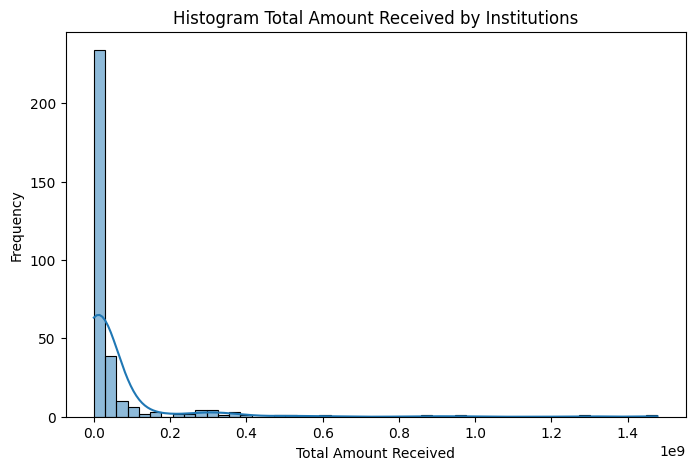

In [11]:
#MAKING HISTOGRAM OF TOTAL AMOUNT RECEIVED BY ALL INSTITUTIONS

totals= df.groupby("Institution Name")['Foreign Gift Amount'].sum()

plt.figure(figsize= (8,5))
sns.histplot(totals, bins= 50, kde= True)
plt.title('Histogram Total Amount Received by Institutions')
plt.xlabel("Total Amount Received")
plt.ylabel("Frequency")

QUESTION 7

In [12]:
top_gift= df.groupby("Giftor Name")['Foreign Gift Amount'].sum().sort_values(ascending= False).head(1)
print(f"The top giftor is: \n {top_gift}")


The top giftor is: 
 Giftor Name
Qatar Foundation    1166503744
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

QUESTION 1

In [13]:
#Loading the Dataset
df1= pd.read_csv('EDA/assignment/data/airbnb_hw.csv')

QUESTION 2: What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [14]:
print(df1.shape)# Tells us the dimensions of the data
print(df1.info())# Tells us the variables included
print(f"The number of observations is {len(df1)}")# Tells us the number of observations
df1.head() # Viewing the first few rows

(30478, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int6

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


QUESTION 3: Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [15]:
crosstab1= pd.crosstab(df1['Room Type'], df1['Property Type'])
print(crosstab1)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

It looks like the Apartments are the most common rental type, and Houses are the second most common ( private rooms). It looks like less common types of properties ( boats, bunglow,castle)- there are less likely to be shared rooms. I also wasn't expecting tree house to be on there. Also it looks Like almost all the types of room had siginifcantly low numbers of shared rooms. It looks like Bed and breakfest has much more (155) private room and only 13 entire rooms. Also it lookes like dorms have 16 private rooms and only 4 entirre homes. It makes sense because these are relaxing/ hospitality like properties so using private rooms was relvant. Some of the rentals I found interesting was Tent, Lighthouse, tree house, and Camper/RV.



QUESTION 4: For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

In [16]:
df1['Price']= df1['Price'].str.replace('$', '')
df1['Price']= df1['Price'].str.replace(',', '')
df1['Price']= df1['Price'].astype(float)
df1= df1[df1['Price']>0]
df1= df1.dropna(subset=['Price'])
print(df1['Price'].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


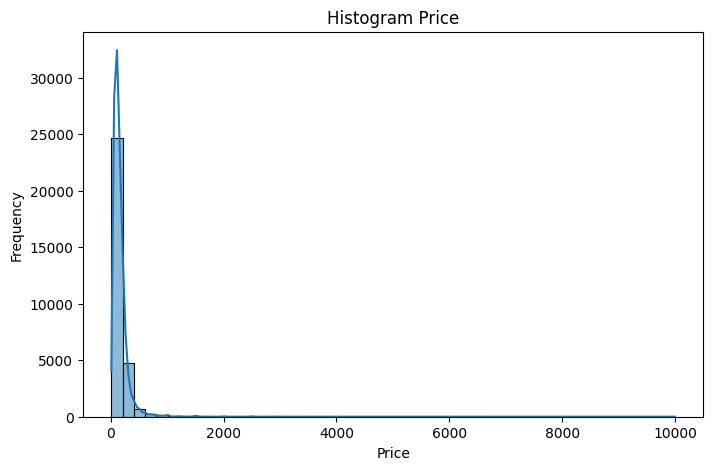

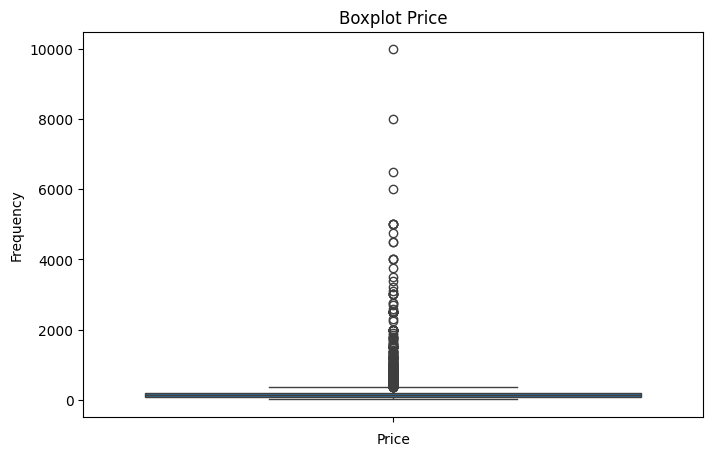

In [17]:
#Importing packages
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (8,5))
sns.histplot(df1['Price'], bins= 50, kde= True)
plt.title('Histogram Price')
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

plt.figure(figsize= (8,5))
sns.boxplot(df1['Price'])
plt.title('Boxplot Price')
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

In [18]:
#Statistical Analysis
print(df1['Price'].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


Yes, it's very badly scaled and the price has a long tail distribution. Looking at the box plot, the graph looks very interesting and has mnay outliers.The min is 10 and max is 10000!

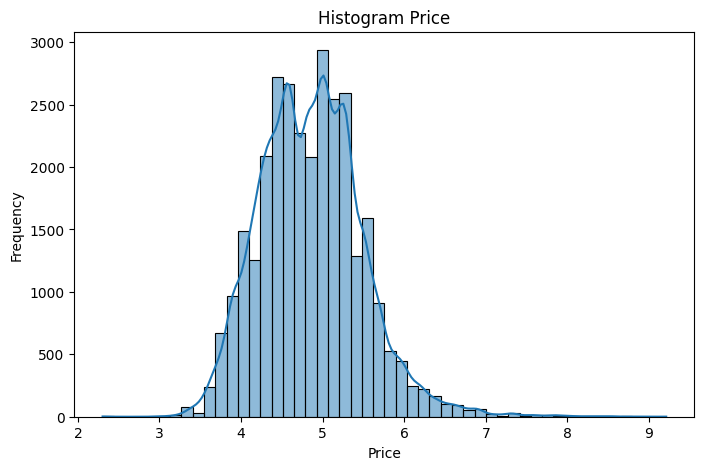

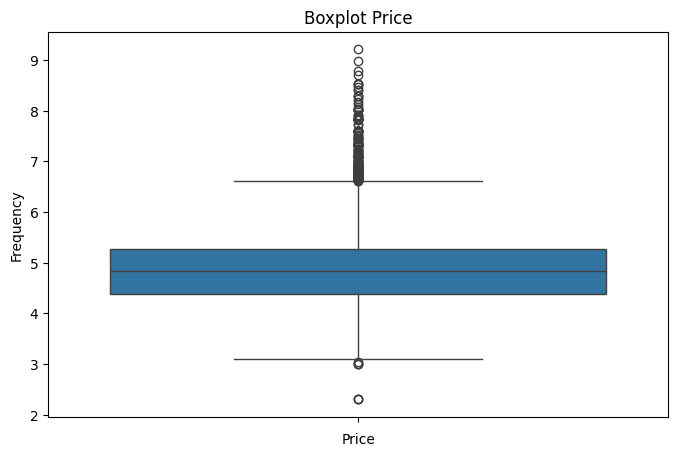

In [19]:
import numpy as np
df1['price_log']= np.log(df1['Price'])
plt.figure(figsize= (8,5))
sns.histplot(df1['price_log'], bins= 50, kde= True)
plt.title('Histogram Price')
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

plt.figure(figsize= (8,5))
sns.boxplot(df1['price_log'])
plt.title('Boxplot Price')
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

This looks better! The histogram resmebles a better curve and there is no relatvly skeness- more normal transformation. Also, the box plot looks better too, but the outliers are still alot ( the circles), but again, the data is not shown to be skewed ( more normal)

QUESTION 5:Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

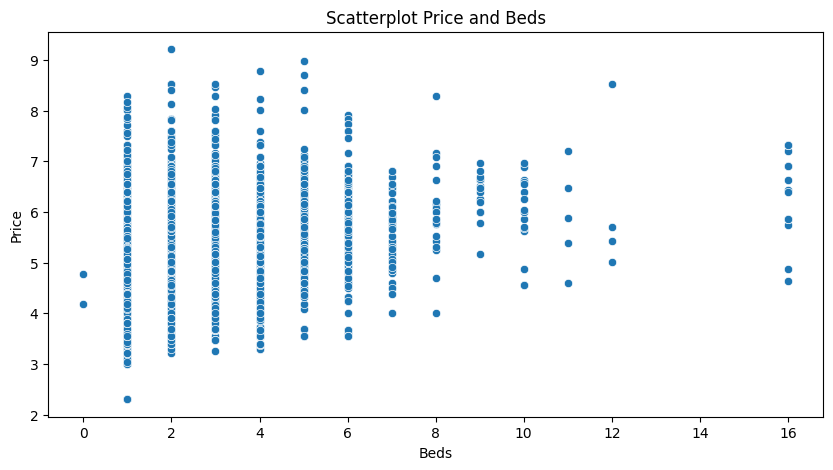

In [20]:
plt.figure(figsize= (10,5))
sns.scatterplot(x=df1['Beds'], y=df1['price_log'], )
plt.title('Scatterplot Price and Beds')
plt.xlabel("Beds")
plt.ylabel("Price")
plt.show()

Some patterns I see is that theres a general trend that increase in beds will also cause the price to increase, and most of the beds counts are between 0 and 6 beds, and it looks like the price has high variability- external factors influence price. Theres cluster arounf 1,2,3,4,5,6 beds ( makes sense because that would be a typical family size range ).

In [21]:
a= df1.groupby("Beds")['Price'].describe()
print(a)

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

Yeah, it makes sense that as the number of beds increase, the avaergae price for beds repsepectly increases as well. Also, I noticed that the std value of price  does generally increase when beds increase and the highest (2388) when beds was 16.  

QUESTION 6: Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?


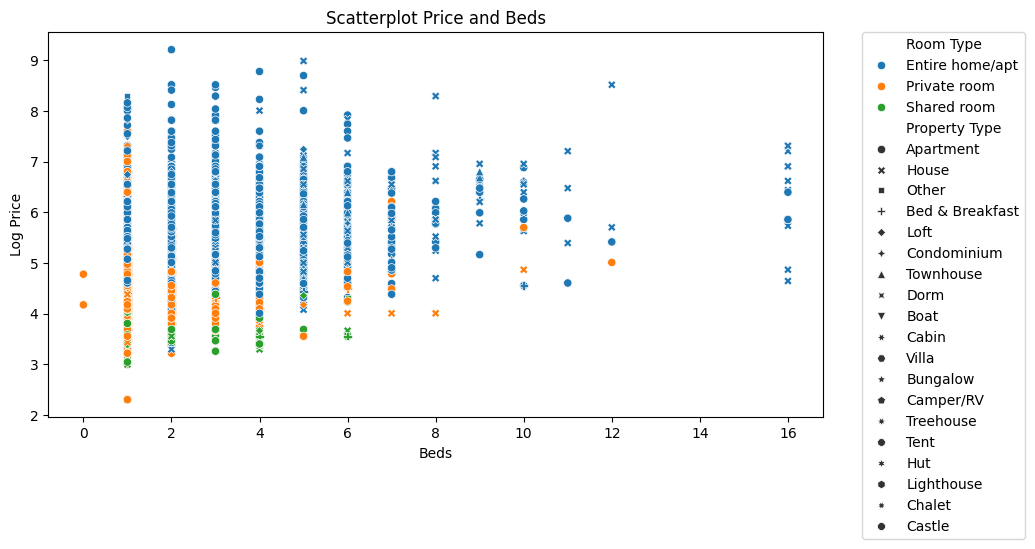

In [22]:
plt.figure(figsize= (10,5))
sns.scatterplot(x=df1['Beds'], y=df1['price_log'], hue= df1['Room Type'], style= df1['Property Type'])
plt.title('Scatterplot Price and Beds')
plt.xlabel("Beds")
plt.ylabel("Log Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It looks like generallaly, Entire Home prices in beds gnerally cost more than beds in a private room- this makes sense because there would be more rooms in entire houses. Shared rooms are consistenly ower priced -because there would be less rooms. Also, it looks ike most are apartmnets and houses. I actually don't see any green values above near the private rooms and entire houses.

In [23]:
print(df1.groupby(["Room Type", "Property Type"])["Price"].describe())

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

It lookd like the highest average price is: 10000.0 ( which was an apartment), the higest standard deviation was other: 1133.062271. It make sense because others could be included and some could be very small price and other types in this category may be larger prices. The mean is somewhate stable but it definetly is skewed ( meaning the lowest mean value is 39.00 ( which was a lighthouse) and the numbers go up to 530 ( which was a villa)- so the mean is somewhat stable of prices but it depends on the property type. Median is similar condition and numbers as mean but we definetly see outlier present with right skewed==> ultimatly inflating the mean above the median and the category with the largest difference between mean and media was the entire home and apt- high skew present. Median is more reliable central tendency measure because it doesn't get affected by outlier values  ( just looking at middle values). Which is why mean is the most influenced- it deals with values ( the mean pulls the distirbution).



QUESTION 7: We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [24]:
print(df1['Beds'].dtype)
print(df1['Beds'].unique())


float64
[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]


In [25]:
# Cleaning bed data
df1['Beds']= pd.to_numeric(df1['Beds'], errors= 'coerce')
df1= df1.dropna(subset=['Beds'])
df1['Beds']= df1['Beds'].astype(int)
df1['Beds'].unique()


<ipython-input-25-a2b005f3e4e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Beds']= df1['Beds'].astype(int)


array([ 1,  3,  2,  4,  5,  6, 10,  7,  8, 12,  0, 16,  9, 11])

In [26]:
print(df1['Beds'].isna().sum())  # How many NaNs?


0


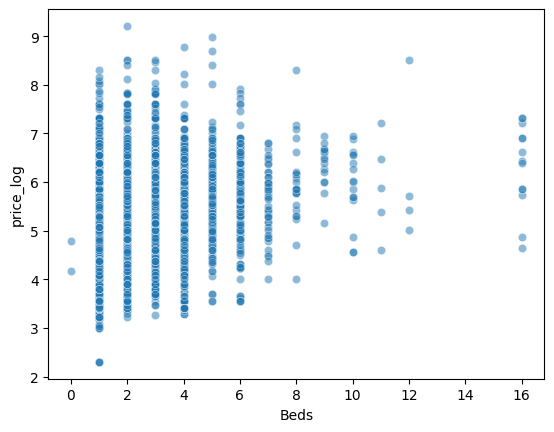

In [27]:
sns.scatterplot(data=df1, x='Beds', y='price_log', alpha=0.5)
plt.show()

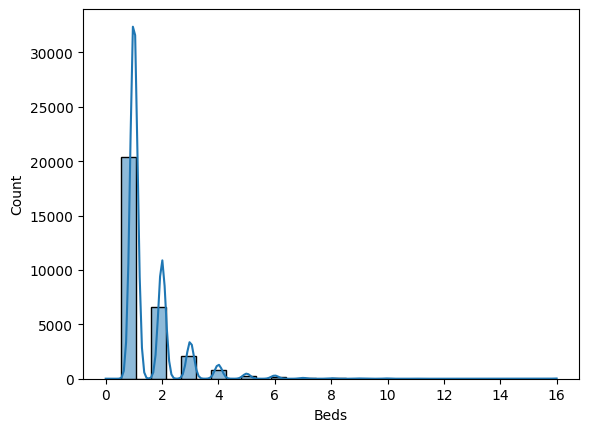

In [28]:
sns.histplot(df1['Beds'], bins=30, kde=True)
plt.show()

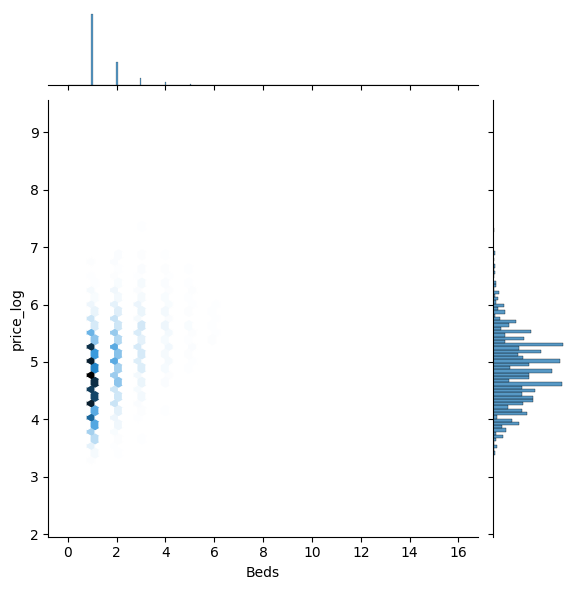

In [32]:
df1['price_log']= np.log(df1['Price'])

sns.jointplot(x=df1['Beds'], y=df1['price_log'], kind= 'hex')

In [34]:
df1['Beds'].describe()


,Beds
count,30393.000000
mean,1.530089
std,1.015359
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16.000000


In [36]:
df1['Beds'].value_counts()


,count
Beds,
1,20344
2,6610
3,2071
4,783
5,284
6,177
7,45
8,24
10,16


In [38]:
df1['price_log'].describe()


,price_log
count,30393.000000
mean,4.860340
std,0.627281
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


In [40]:
df1['price_log'].isna().sum()


0

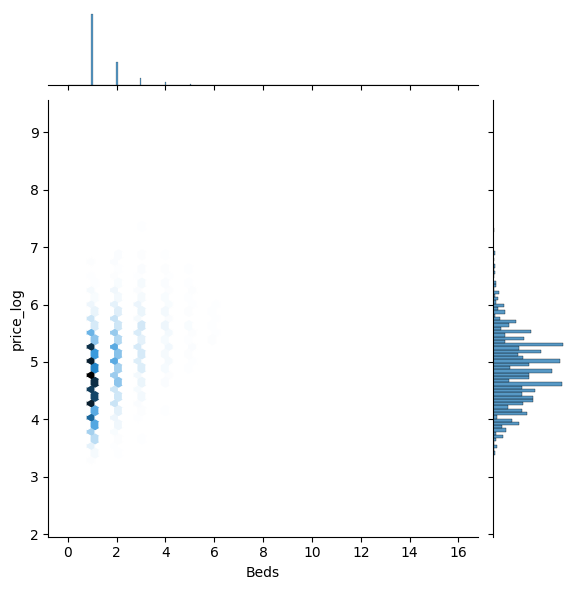

In [42]:
sns.jointplot(x='Beds', y='price_log', data=df1, kind='hex')


To answer the question on the distribution of the graph above. It's mostly consistent with the graphs from earlier. Instead, it looks Like most of the beds are between 0-4 ( with 1 being the most counts). Simiarly, the graphs from earlier tends to show more clear view of the distribution, which this shows concentration in a certain interva;, but "kept" the other variables "faded"- this type of plot may come in handy if you are specfialy analyzing the amount of beds and relative price distribution ( focusing on the concentration) rather than the whole picture- if that makes sense.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.